# 프로젝트 체크리스트 (2024-02-02 기초통계)


## 기술통계 및 추정 (7)

 데이터셋의 전체 구조 파악 (변수의 종류, 데이터의 크기 등) > 3-1. Understand Data

 기술통계량 계산 (평균, 중앙값, 분산, 표준편차 등) > 3-2. Data Cleaning

 데이터 분포 탐색 (정규성 검정, 왜도 및 첨도 분석) > 4. EDA

 이상치 탐색 및 처리 > 3-2. Data Cleaning

 결측치 탐색 및 처리 > 3-2. Data Cleaning

 상관관계 분석 > 

 시각화를 통한 데이터 탐색 (히스토그램, 박스플롯, 산점도 등) > 4. EDA



## 추정 (3)

 모집단의 특성 추정 (신뢰구간 계산) 

 표본 크기 결정 

 추정 오차 분석 



## 검정 (5)

 가설 설정: 귀무가설과 대립가설

 적절한 검정 방법 선택: t-검정, 카이제곱 검정, ANOVA 등

 검정 수행 및 결과 해석

 검정의 유의성 평가: p-값, 신뢰구간

 검정 결과에 대한 해석 및 결론 도출



## 회귀 분석 (4)

 회귀 모델 선택: 선형 회귀, 다중 회귀, 로지스틱 회귀 등

 회귀 계수 해석: 각 독립 변수의 영향력 파악

 모델 적합도 검증: 결정 계수(R²), 잔차 분석 등

 다중공선성 진단: VIF 등을 통한 독립 변수 간 상호 의존성 검사

# 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

# 2. Load datasets

In [4]:
df_offer = pd.read_csv('~/aiffel/data/sb_portfolio.csv')
df_offer.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
df_customer = pd.read_csv('~/aiffel/data/sb_profile.csv')
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
df_transcript = pd.read_csv('~/aiffel/data/sb_transcript.csv')
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# 3. Data Preparation

## 3-1. Understand Dataset

In [7]:
# Understand the df_offer dataset
df_offer.info()
df_offer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


In [8]:
# Understand the df_customer dataset
df_customer.info()
df_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


In [9]:
# Understand the df_transcript dataset
df_transcript.info()
df_transcript.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


## 3-2. Data Cleaning

In [10]:
# Drop 'Unnamed:0' column from the datasets
df_offer.drop('Unnamed: 0', axis = 1, inplace = True)
df_customer.drop('Unnamed: 0', axis = 1, inplace = True)
df_transcript.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
# Check missing data in the datasets
df_offer.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [12]:
df_customer.isnull().sum() # Missing data in 'gender' and 'income' columns

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [13]:
missing_gender = df_customer[df_customer['gender'].isnull()]
missing_income = df_customer[df_customer['income'].isnull()]
np.sum(missing_gender['id'] == missing_income['id']) # Same missing data in 'gender' and 'income' columns

2175

In [14]:
# Drop 'gender' and 'income' missing data from the dataset df_customer
df_customer.drop(df_customer[df_customer['gender'].isnull()].index, inplace=True)

In [15]:
df_customer.isnull().sum() # No more missing data in the dataset df_customer

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [16]:
df_transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

## 3-3. Understand Data Type

In [17]:
df_offer.info()
df_offer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [18]:
df_customer.info()
df_customer.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


,gender,age,id,became_member_on,income
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0
16999,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0


In [19]:
df_customer['became_member_on'] = pd.to_datetime(df_customer['became_member_on'], format = '%Y%m%d')

In [20]:
df_customer.info()
df_customer.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [21]:
df_transcript.info()
df_transcript.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [22]:
# Rename 'time' to 'hours_since_start' in the df_transcript dataset
df_transcript.rename(columns = {'time': 'hours_since_start'}, inplace = True)

In [23]:
df_transcript.head()

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## 3-4. Transform Data

In [24]:
import json

# Function to convert string to dictionary and extract key and value
def extract_key_value(value_str):
    value_str = value_str.replace("'", '"')  # Convert single quotes to double quotes for valid JSON
    value_dict = json.loads(value_str)
    key = list(value_dict.keys())[0]
    value = list(value_dict.values())[0]
    return key, value

# Apply the function to the 'value' column
df_transcript['key'], df_transcript['value'] = zip(*df_transcript['value'].apply(extract_key_value))

df_transcript.head()

,person,event,value,hours_since_start,key
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id


# 4. EDA

## 4-1. Dataset df_customer

In [25]:
df_customer.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


<Axes: xlabel='age', ylabel='Count'>

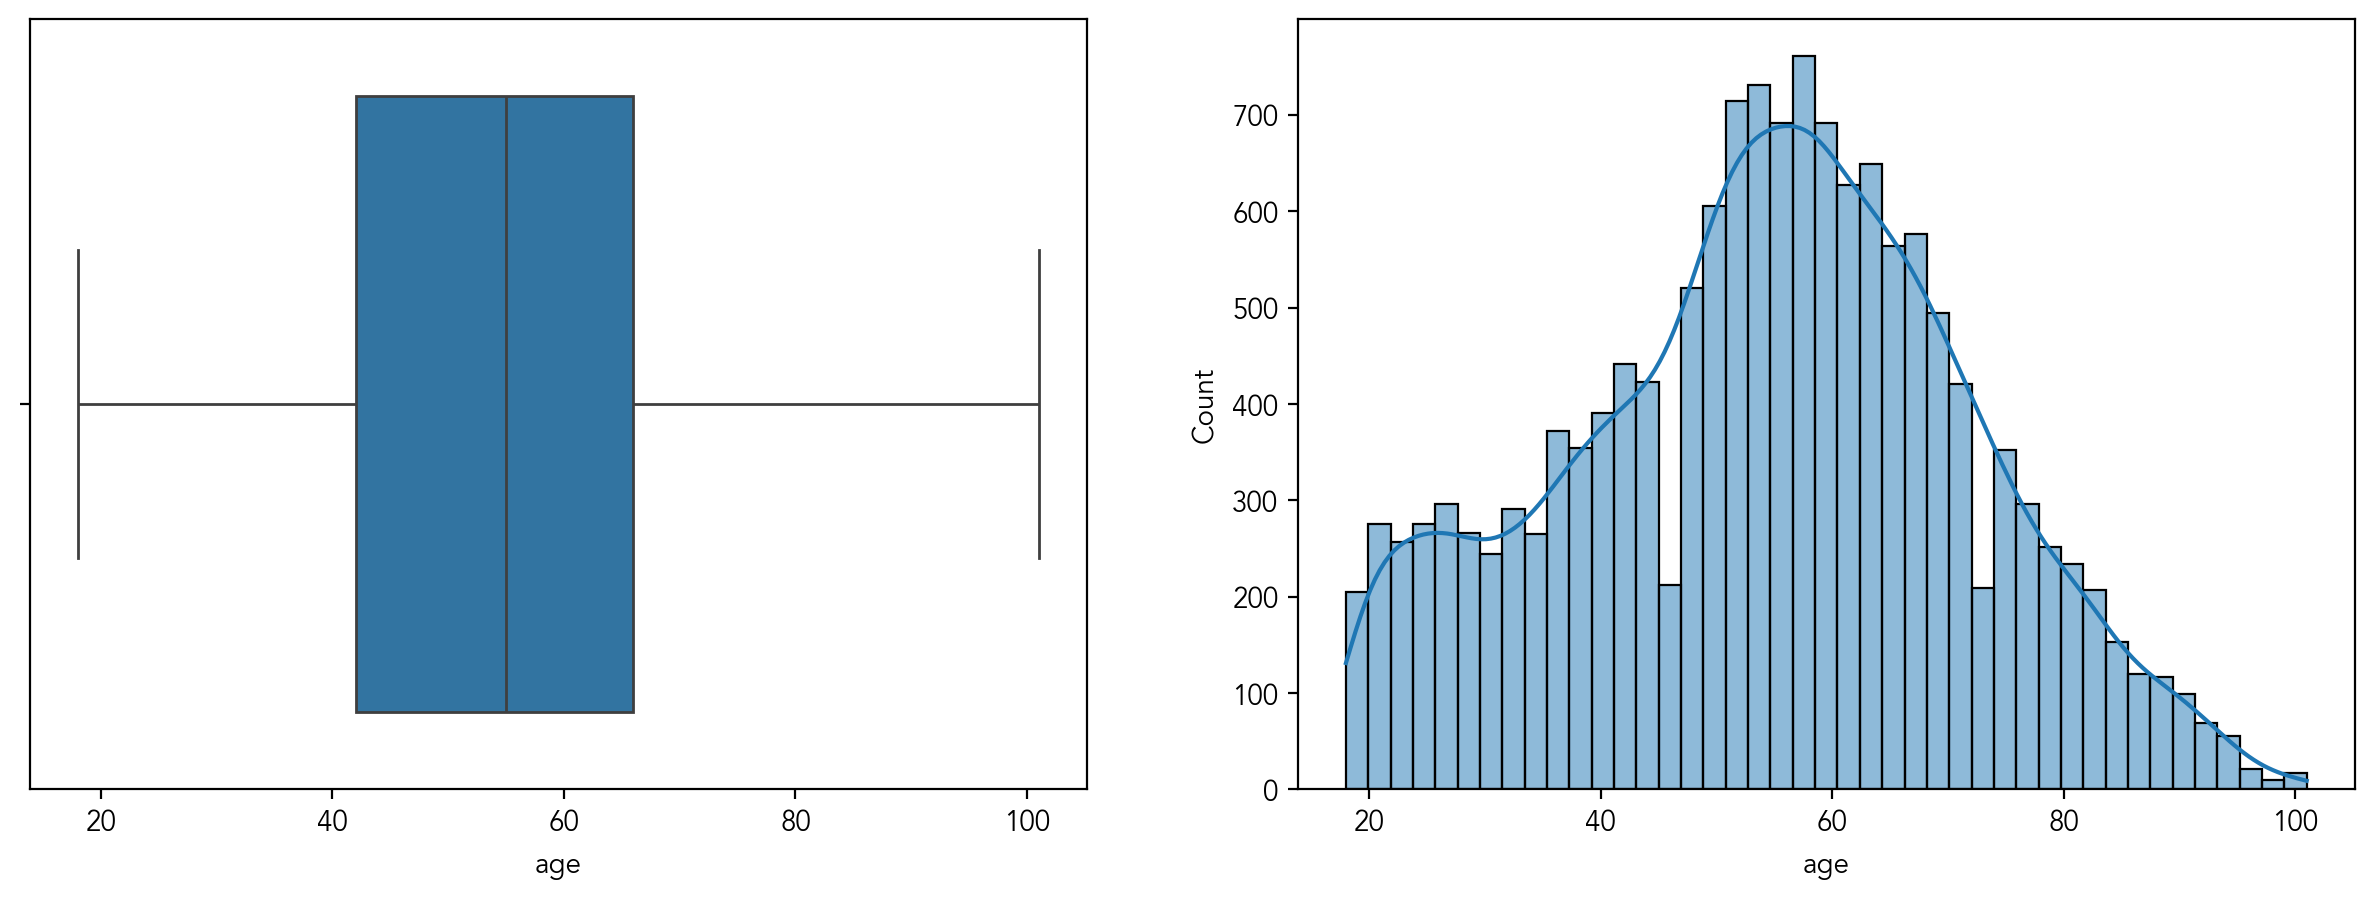

In [26]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(data = df_customer, x = 'age', ax = ax[0])
sns.histplot(data = df_customer, x = 'age', kde = True, ax = ax[1])

<Axes: xlabel='income', ylabel='Count'>

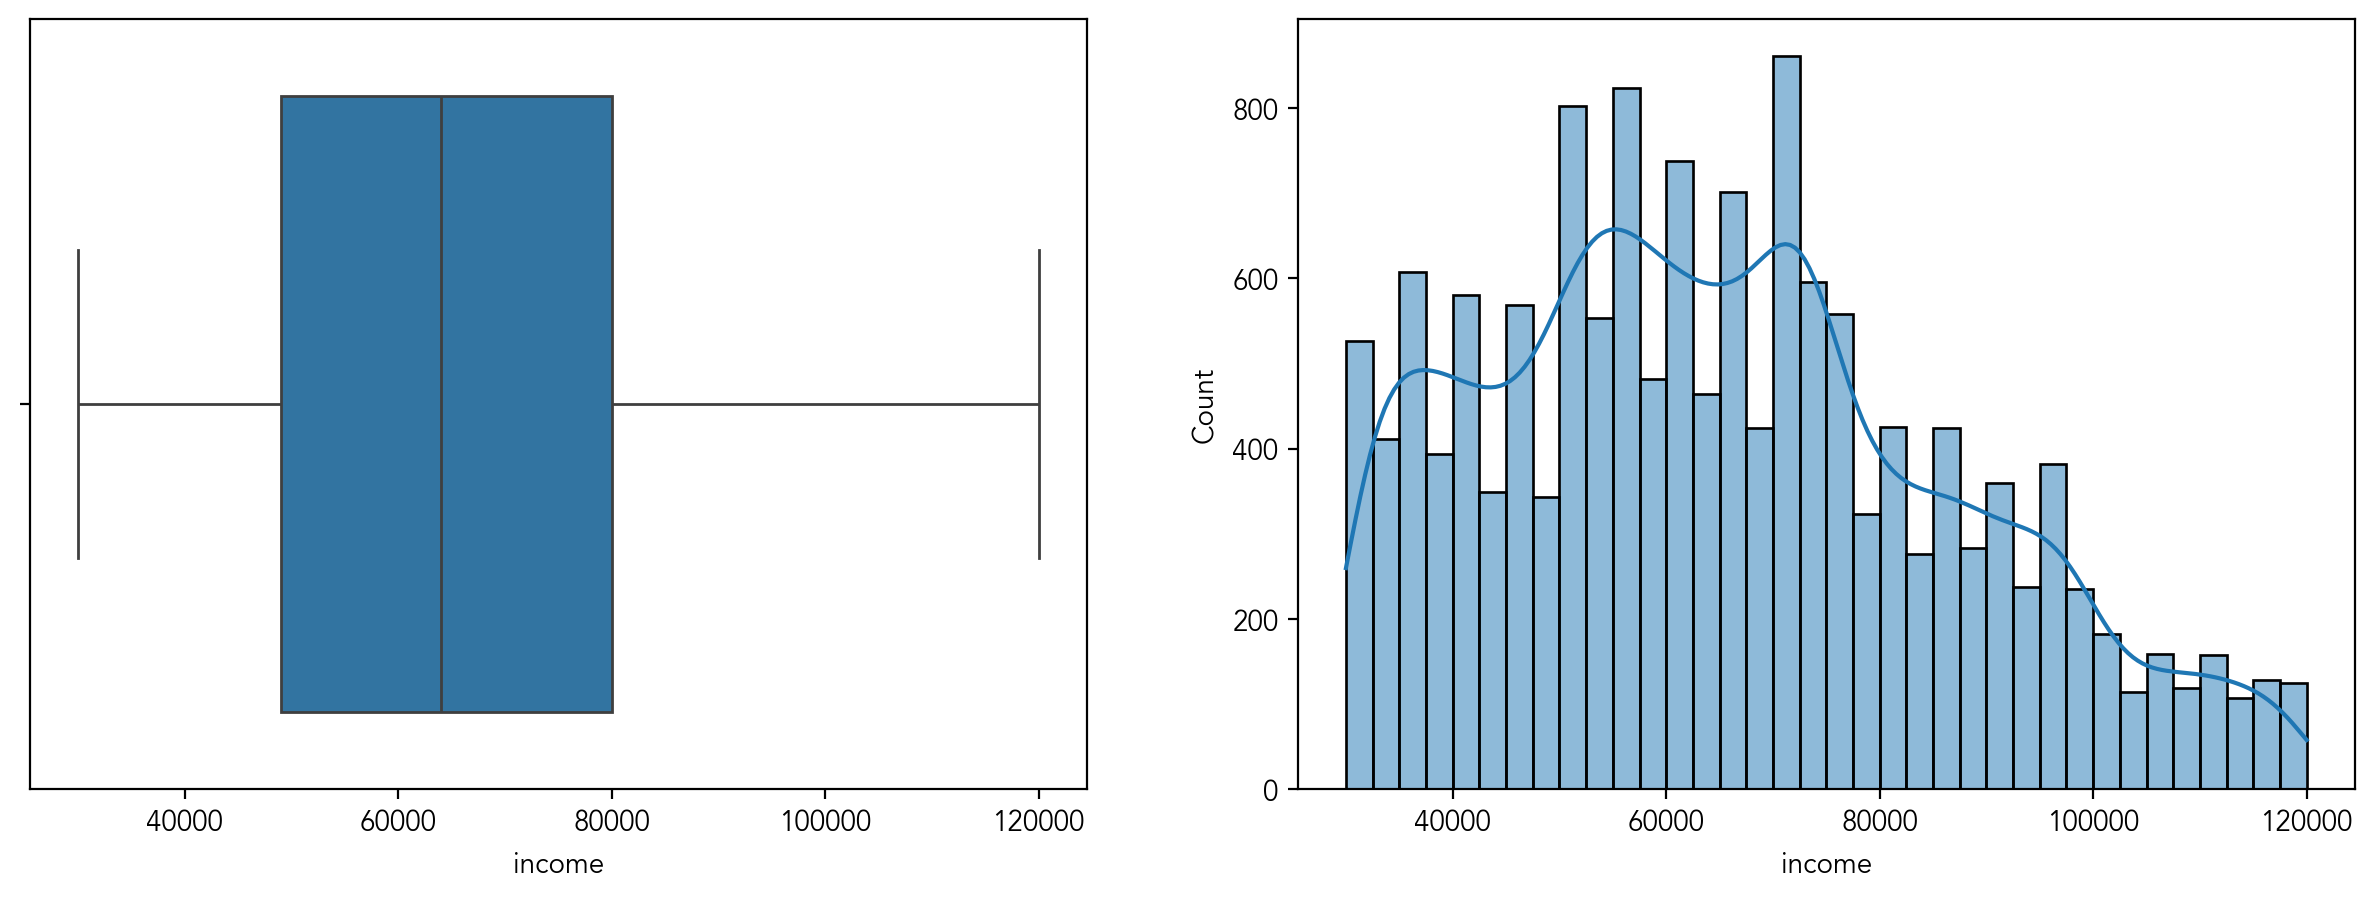

In [27]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(data = df_customer, x = 'income', ax = ax[0])
sns.histplot(data = df_customer, x = 'income', kde = True, ax = ax[1])

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


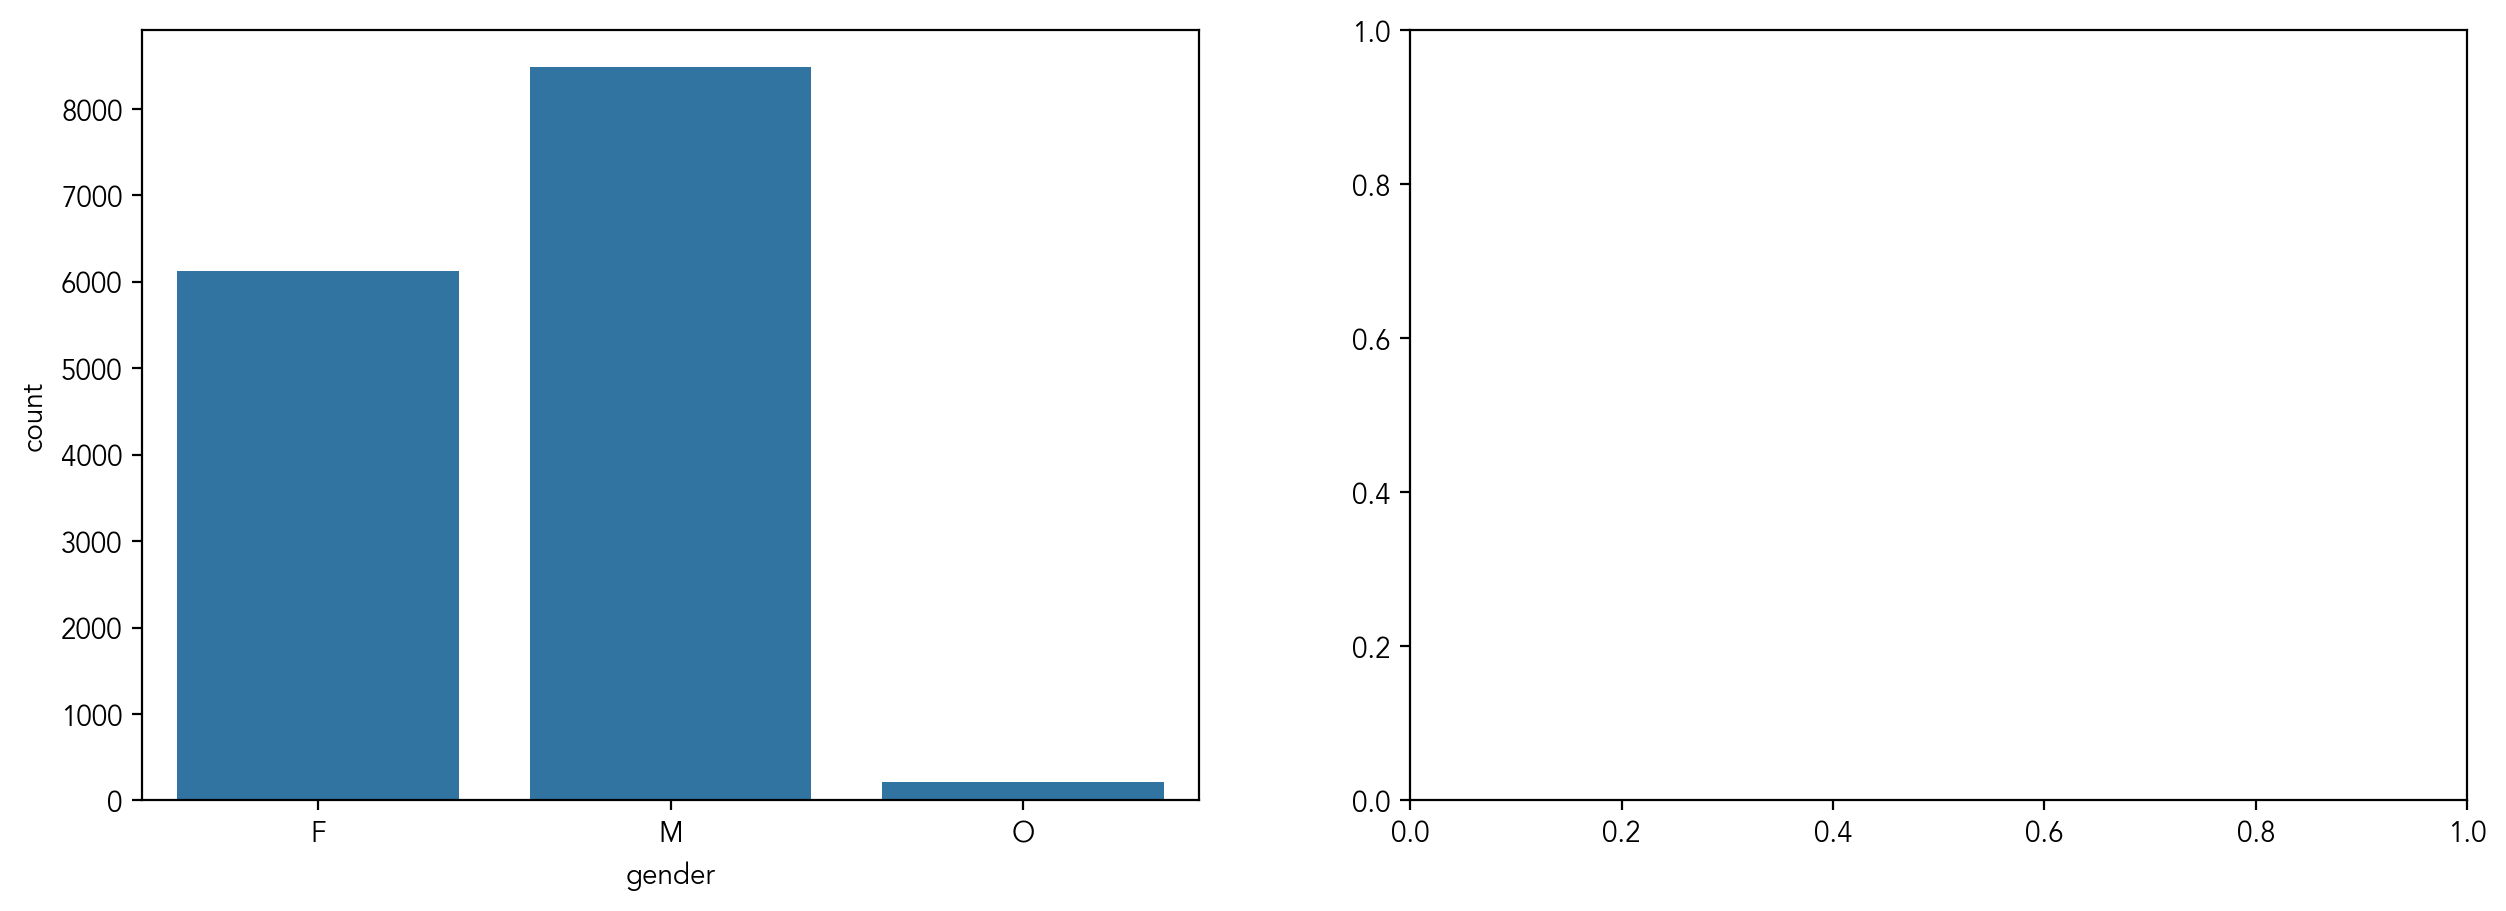

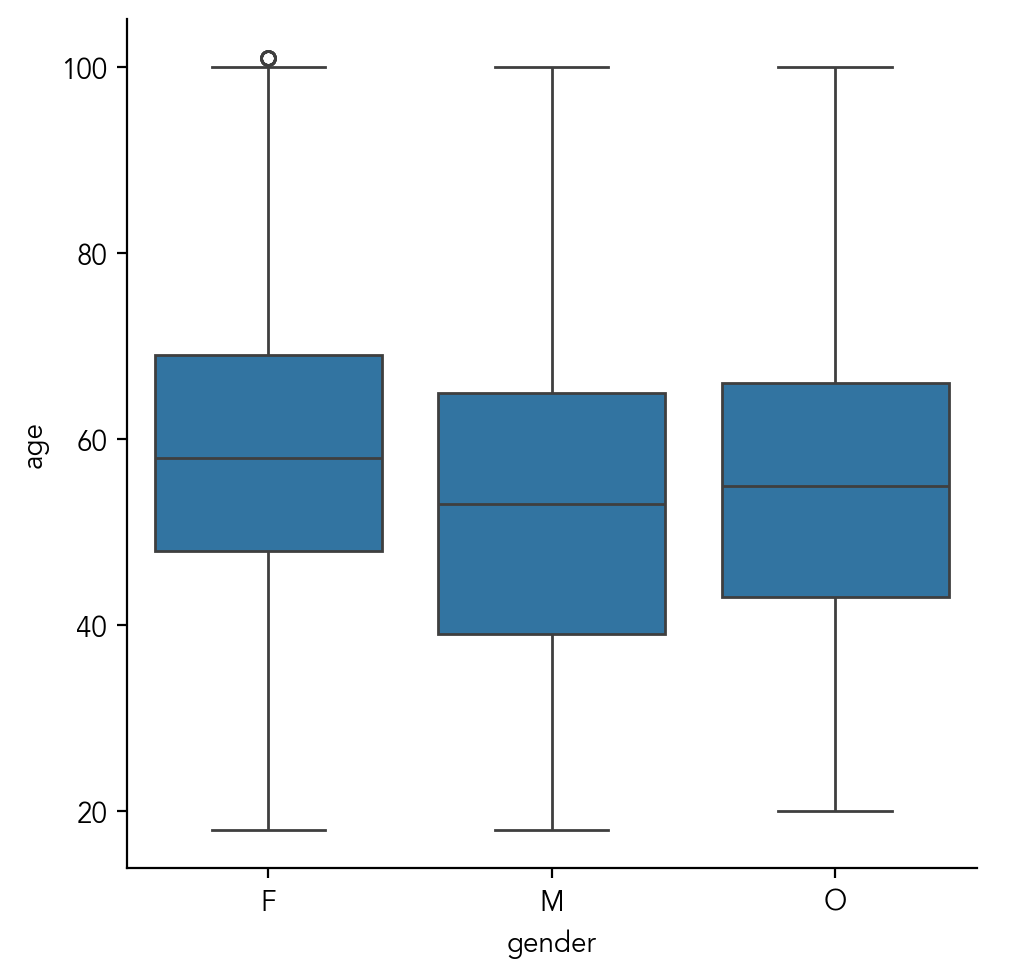

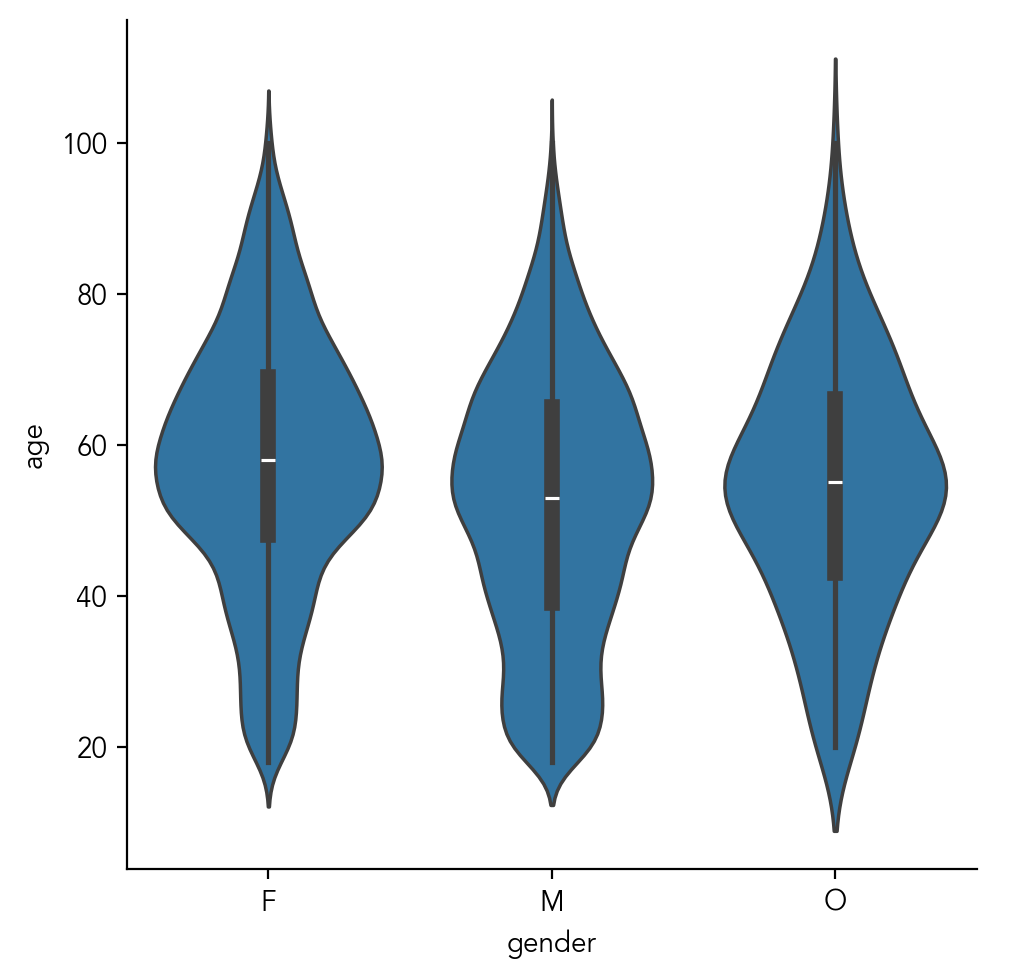

In [28]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(data = df_customer, x = 'gender', ax = ax[0])
sns.catplot(kind = 'box',  data = df_customer, x = 'gender', y = 'age', ax = ax[1])
sns.catplot(kind = 'violin',  data = df_customer, x = 'gender', y = 'age', ax = ax[1])

### 4-2. Dataset df_transcript

In [29]:
df_transcript.head()

,person,event,value,hours_since_start,key
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id


In [30]:
df_offer.head(20)

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [31]:
df_customer.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


# 5. Data Merge

- df_transcript['person'] = df_customer['id']
- df_transcript['value'] = df_offer['id']

In [32]:
# Merge df_transcript and df_customer on 'person' and 'id'
df_merged = df_transcript.merge(df_customer, left_on='person', right_on='id', how = 'inner')
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   id                 272762 non-null  object        
 8   became_member_on   272762 non-null  datetime64[ns]
 9   income             272762 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 20.8+ MB


,person,event,value,hours_since_start,key,gender,age,id,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0


In [33]:
# Merge df_merged and df_offer on 'key' and 'id'
df_final = df_merged.merge(df_offer, left_on='value', right_on='id', how = 'left')
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   id_x               272762 non-null  object        
 8   became_member_on   272762 non-null  datetime64[ns]
 9   income             272762 non-null  float64       
 10  reward             148805 non-null  float64       
 11  channels           148805 non-null  object        
 12  difficulty         148805 non-null  float64       
 13  duration           148805 non-null  float64 

,person,event,value,hours_since_start,key,gender,age,id_x,became_member_on,income,reward,channels,difficulty,duration,offer_type,id_y
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Drop 'id_x' and 'id_y' columns from the dataset df_final
df_final.drop(['id_x', 'id_y'], axis = 1, inplace = True)

In [35]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   person             272762 non-null  object        
 1   event              272762 non-null  object        
 2   value              272762 non-null  object        
 3   hours_since_start  272762 non-null  int64         
 4   key                272762 non-null  object        
 5   gender             272762 non-null  object        
 6   age                272762 non-null  int64         
 7   became_member_on   272762 non-null  datetime64[ns]
 8   income             272762 non-null  float64       
 9   reward             148805 non-null  float64       
 10  channels           148805 non-null  object        
 11  difficulty         148805 non-null  float64       
 12  duration           148805 non-null  float64       
 13  offer_type         148805 non-null  object  

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN


In [36]:
max(df_final['hours_since_start'])

714

In [37]:
df_final['how_long_mbr'] = max(df_final['became_member_on'])-df_final['became_member_on']

In [38]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   person             272762 non-null  object         
 1   event              272762 non-null  object         
 2   value              272762 non-null  object         
 3   hours_since_start  272762 non-null  int64          
 4   key                272762 non-null  object         
 5   gender             272762 non-null  object         
 6   age                272762 non-null  int64          
 7   became_member_on   272762 non-null  datetime64[ns] 
 8   income             272762 non-null  float64        
 9   reward             148805 non-null  float64        
 10  channels           148805 non-null  object         
 11  difficulty         148805 non-null  float64        
 12  duration           148805 non-null  float64        
 13  offer_type         148805 non

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type,how_long_mbr
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days


# EDA dataset df_final

In [39]:
df_final.head(20)

,person,event,value,hours_since_start,key,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type,how_long_mbr
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,offer id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,offer_id,F,75,2017-05-09,100000.0,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,443 days
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,5a8bc65990b245e5a138643cd4eb9837,168,offer id,F,75,2017-05-09,100000.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,443 days
6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,5a8bc65990b245e5a138643cd4eb9837,216,offer id,F,75,2017-05-09,100000.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,443 days
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.67,222,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,29.72,240,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,23.93,378,amount,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,443 days


<Axes: xlabel='event'>

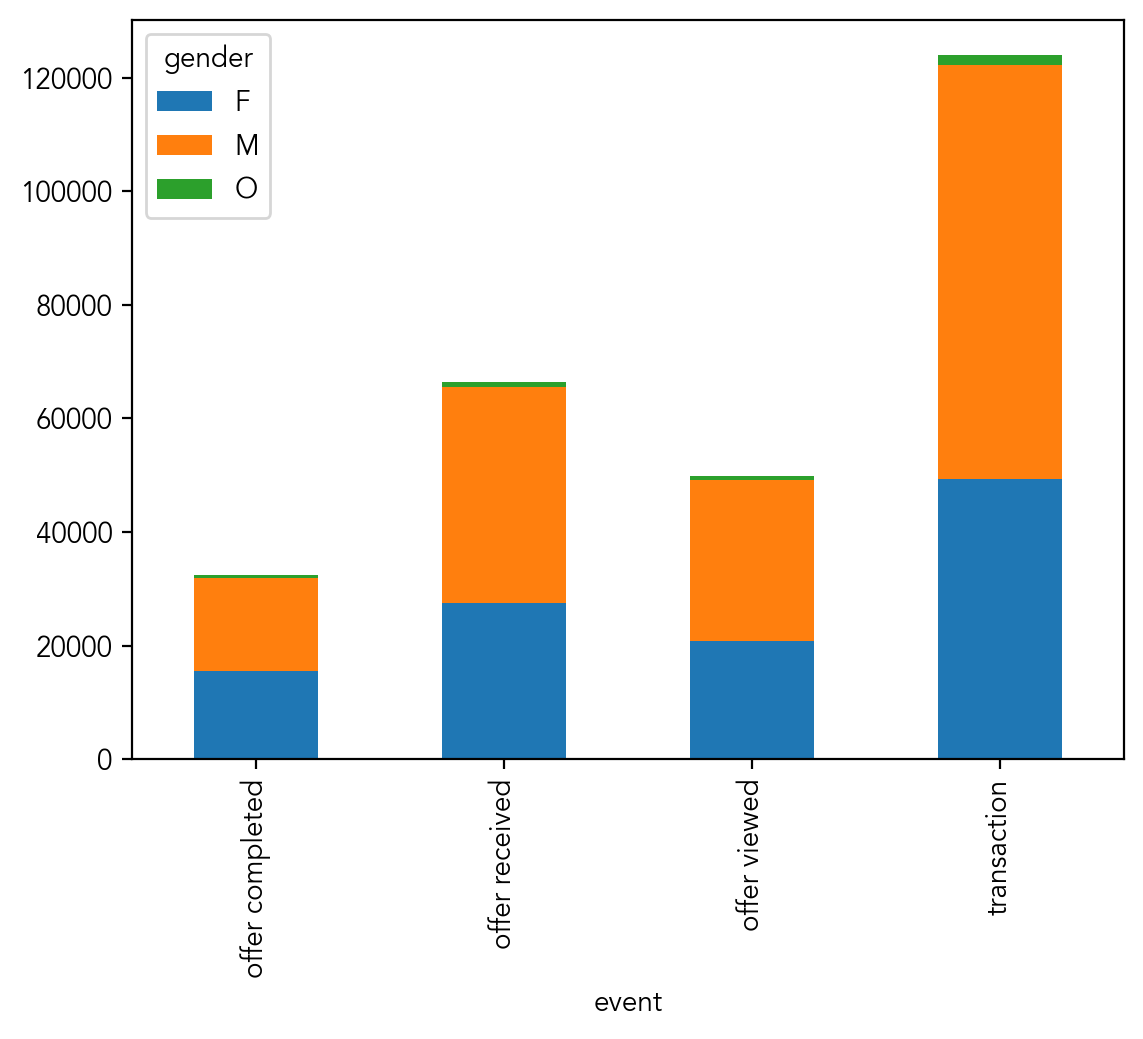

In [48]:
pd.crosstab(df_final['event'], df_final['gender']).plot(kind = 'bar', stacked = True)


<Axes: xlabel='event', ylabel='count'>

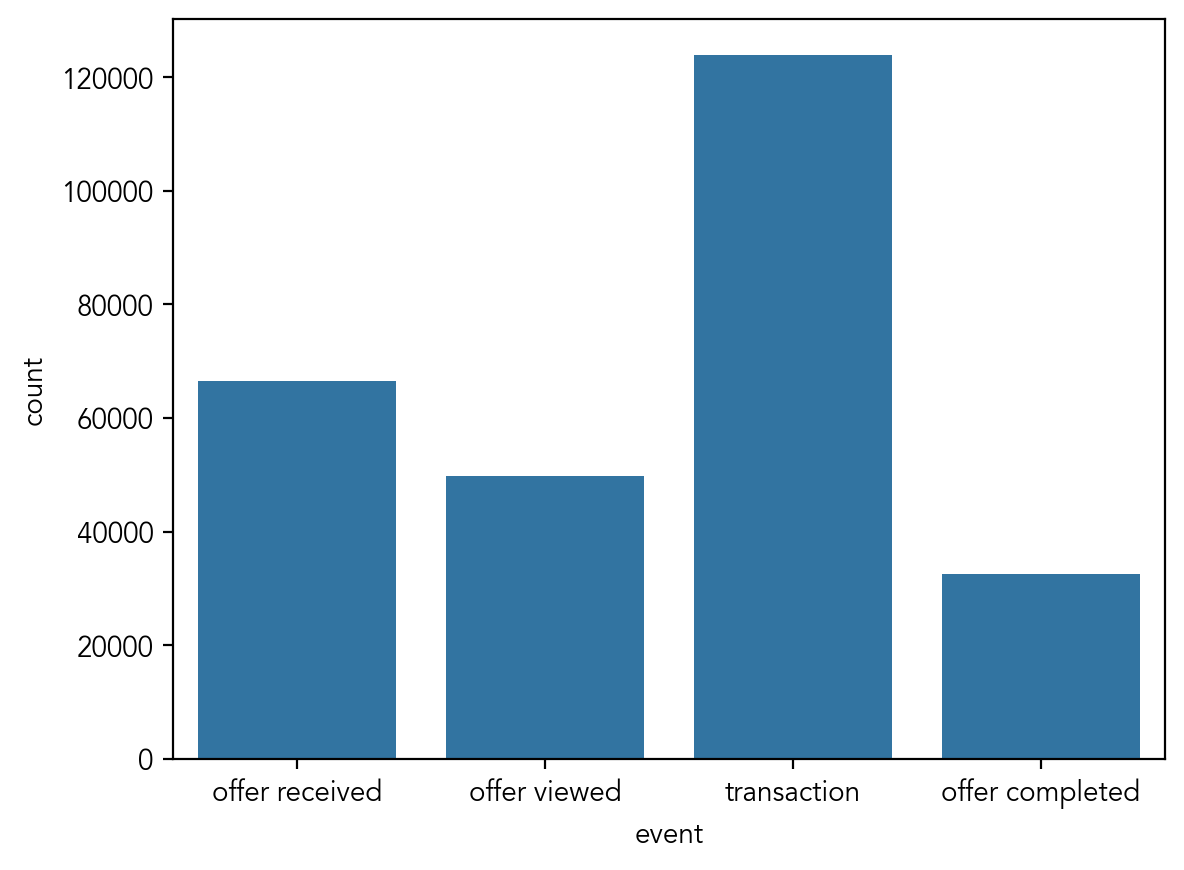

In [50]:
sns.countplot(data = df_final, x = 'event')

# EDA Transactional Dataset

In [61]:
df_final_transaction = df_final[df_final['event'] == 'transaction']
df_final_transaction.drop(['reward', 'channels', 'difficulty', 'duration', 'offer_type'], axis = 1, inplace = True)
df_final_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123957 entries, 2 to 272755
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   person             123957 non-null  object         
 1   event              123957 non-null  object         
 2   value              123957 non-null  object         
 3   hours_since_start  123957 non-null  int64          
 4   key                123957 non-null  object         
 5   gender             123957 non-null  object         
 6   age                123957 non-null  int64          
 7   became_member_on   123957 non-null  datetime64[ns] 
 8   income             123957 non-null  float64        
 9   how_long_mbr       123957 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 10.4+ MB


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_8120/1773317043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_transaction.drop(['reward', 'channels', 'difficulty', 'duration', 'offer_type'], axis = 1, inplace = True)


In [75]:
# Removing outliers based on the 3-sigma rule

mean = df_final_transaction['value'].mean()
std = df_final_transaction['value'].std()

df_final_transaction = df_final_transaction[(df_final_transaction['value'] > (mean - 3 * std)) & (df_final_transaction['value'] < (mean + 3 * std))]

In [84]:
df_final_transaction['how_long_mbr_n'] = df_final_transaction['how_long_mbr'].astype('int')

In [85]:
df_final_transaction.isnull().sum()

person               0
event                0
value                0
hours_since_start    0
key                  0
gender               0
age                  0
became_member_on     0
income               0
how_long_mbr         0
how_long_mbr_n       0
dtype: int64

In [77]:
df_final_transaction['value'].mean()

12.402660902511395

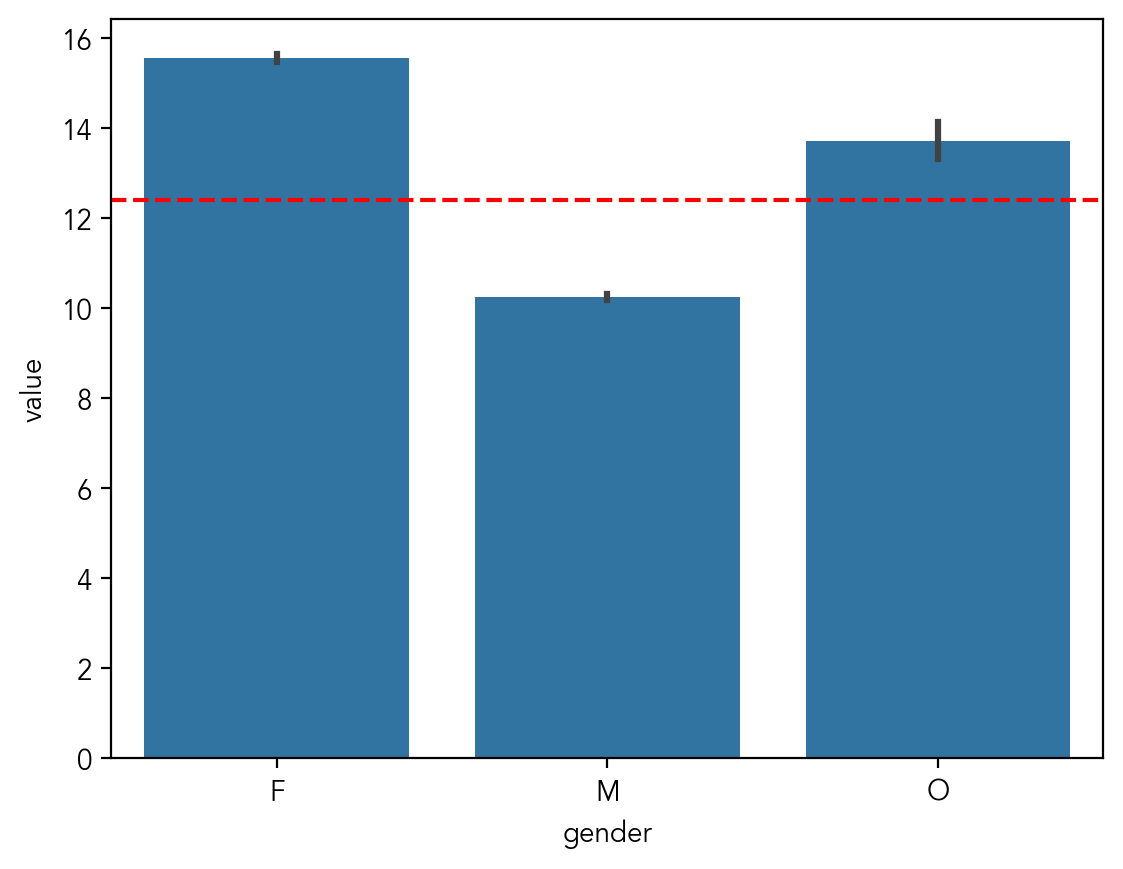

In [78]:
sns.barplot(data = df_final_transaction, x = 'gender', y = 'value')
plt.axhline(df_final_transaction['value'].mean(), color = 'r', linestyle = '--')


<Axes: xlabel='value', ylabel='Count'>

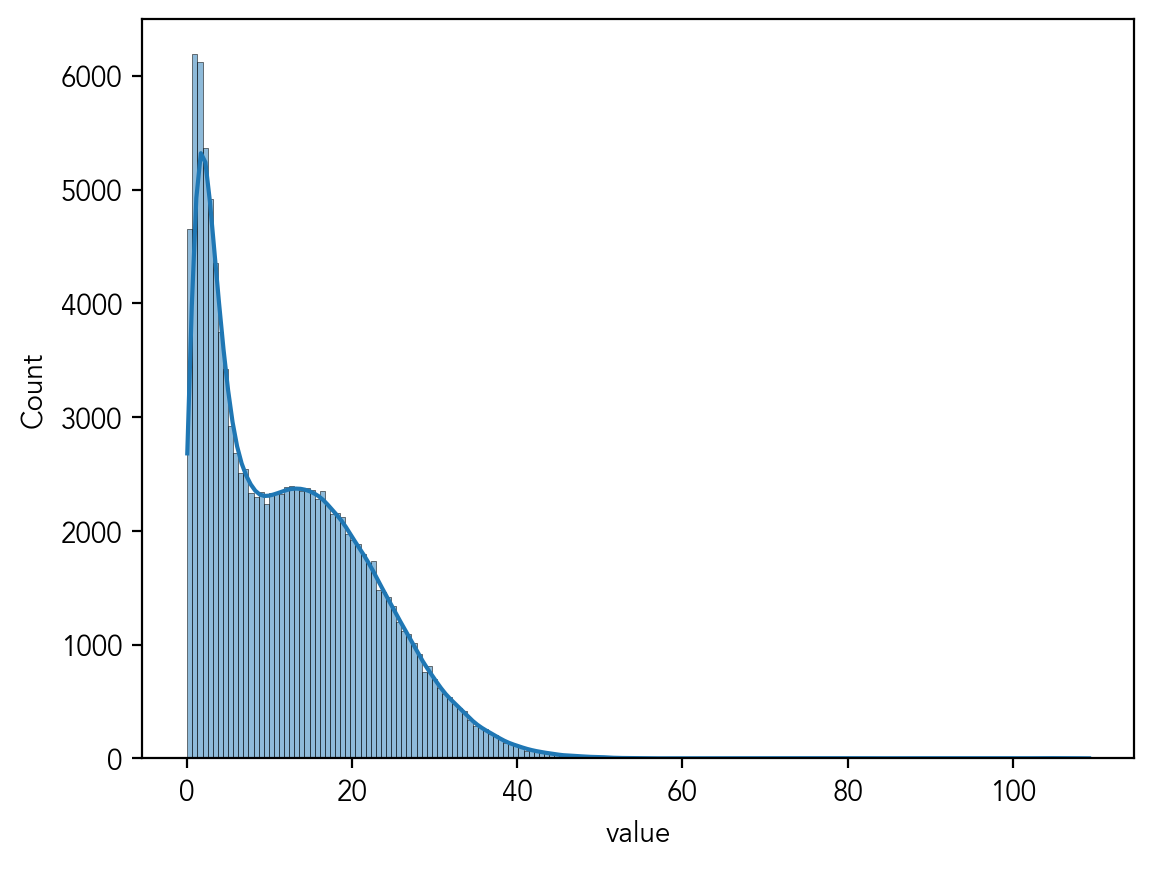

In [79]:
sns.histplot(data = df_final_transaction, x = 'value', kde = True)

<Axes: xlabel='age', ylabel='Count'>

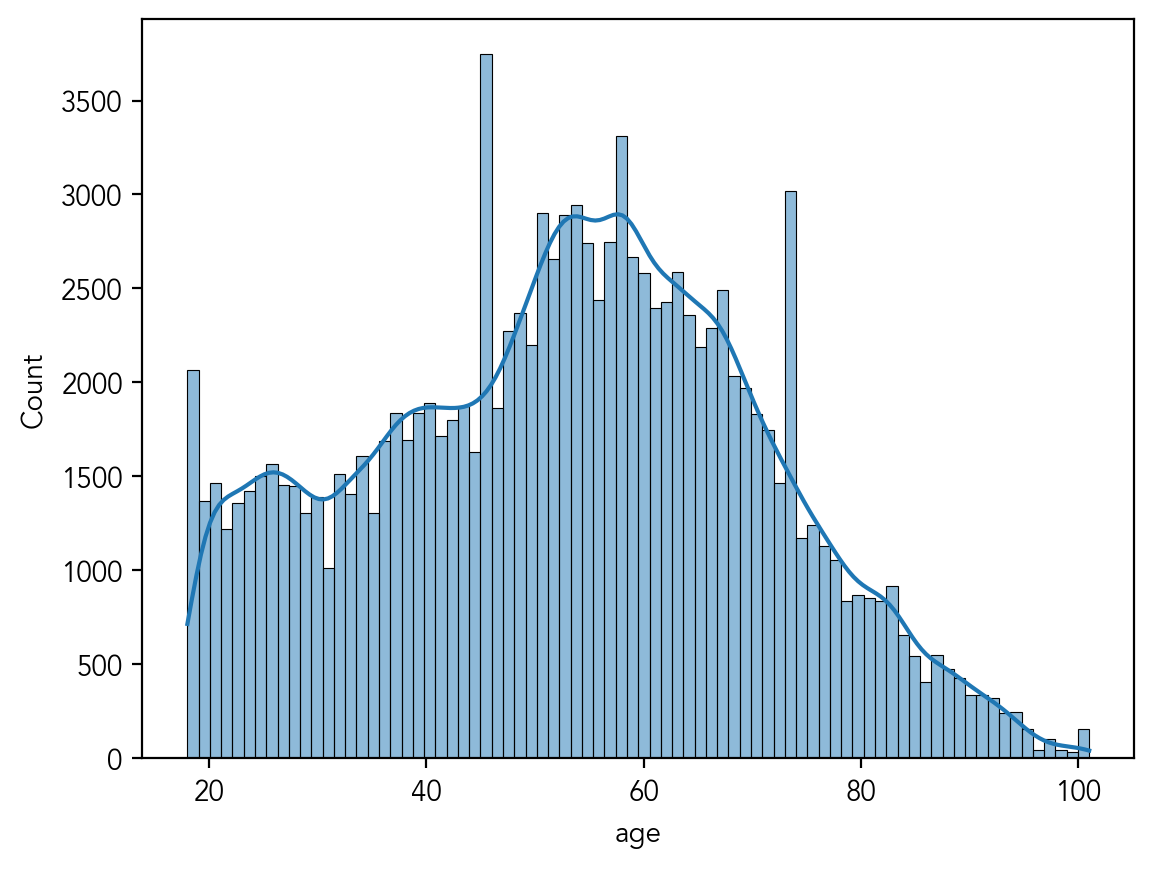

In [83]:
sns.histplot(data = df_final_transaction, x = 'age', kde = True)

<Axes: xlabel='income', ylabel='Count'>

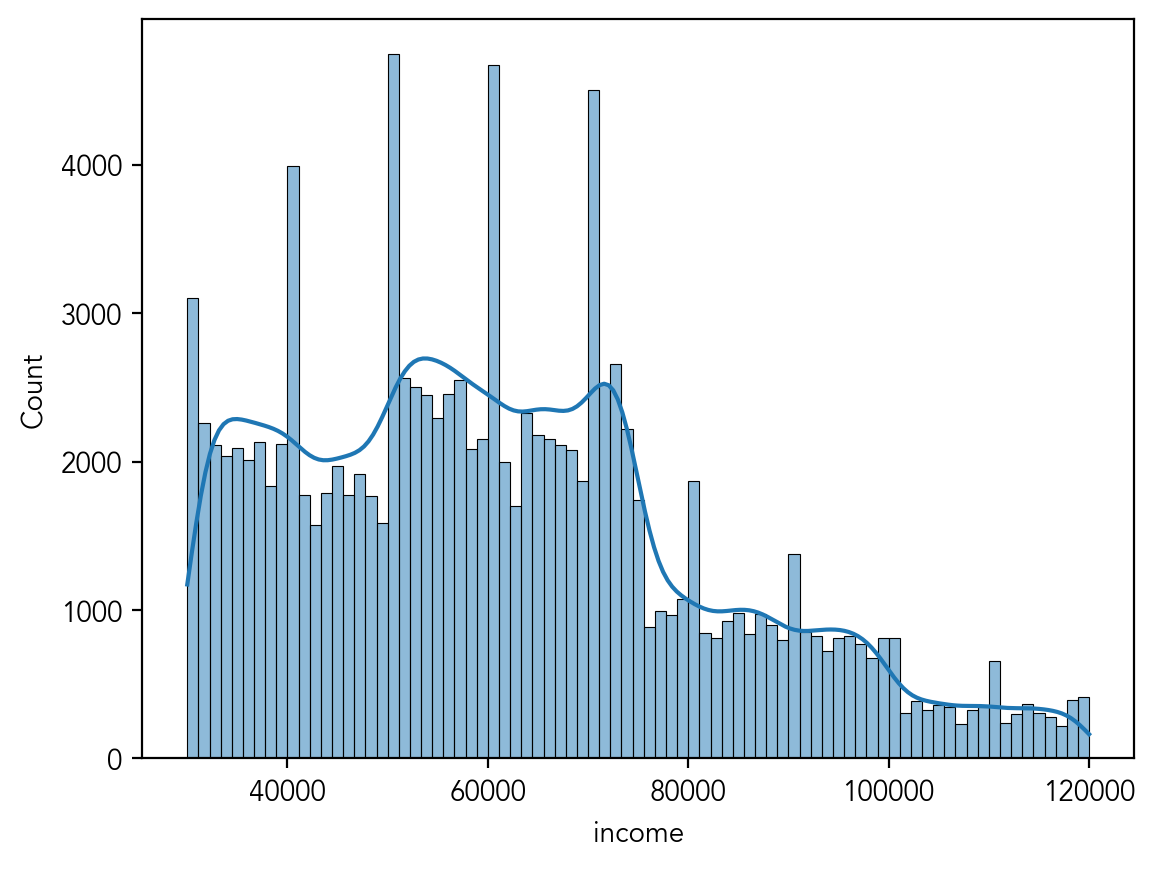

In [88]:
sns.histplot(data = df_final_transaction, x = 'income', kde = True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

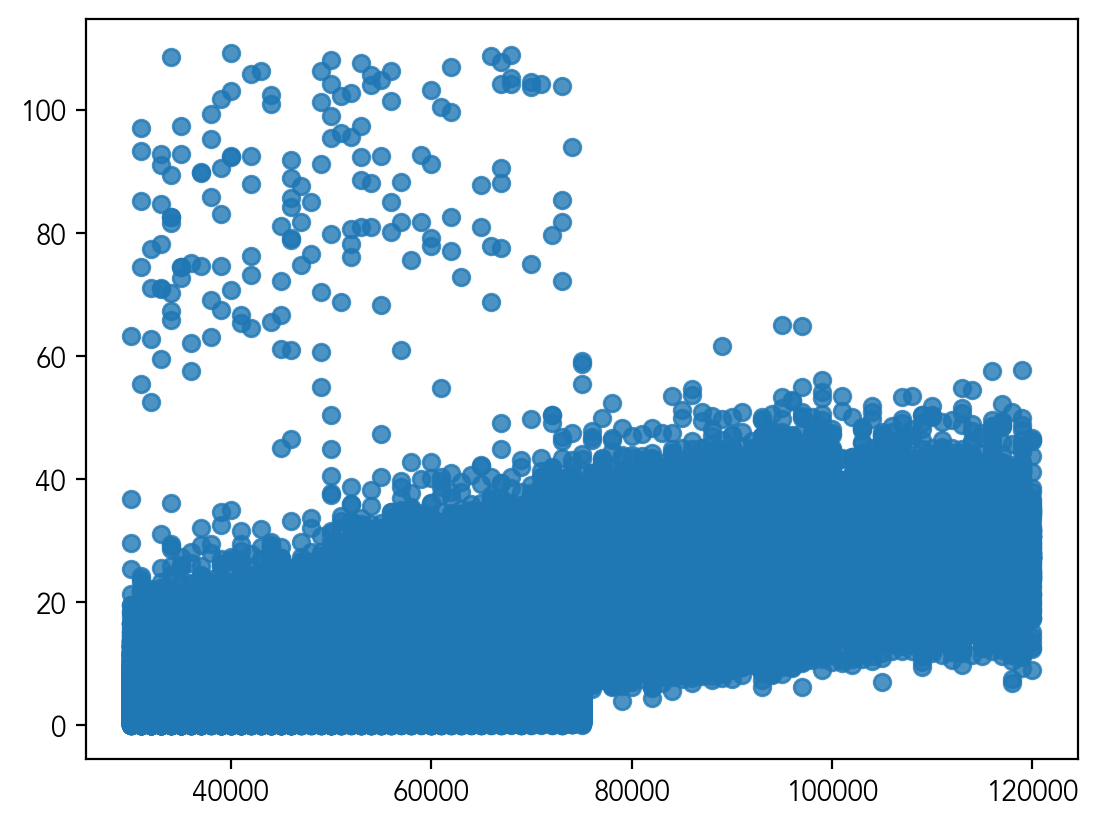

In [87]:
# Convert 'income' column to numeric type
sns.regplot(data=df_final_transaction, x='income', y='value')
